<a href="https://colab.research.google.com/github/Ferchisx/EjerciciosSyS/blob/Ejercicios/Parcial3/Punto2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# @title Instalamos las librerias necesarias
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as sf
import pandas as pd
import matplotlib as mpl
import yt_dlp as youtube_dl
import subprocess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 15.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 7.0 MB/s eta 0:00:00
  Created w

In [3]:
# @title Definimos la funcion de descarga del video
def descarga(video_url,name):
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

In [4]:
# @title Ingreso de la cancion y toma de la muestra
CAC = input("Ingrese el link de su cancion favorita: ")
descarga(CAC,'Cancion')

subprocess.call(['ffmpeg','-y', '-i', 'Cancion'+'.mp3',
                   'Cancion'+'.wav'])

plc = np.array([20])    # El punto de lectura de la canción ingresada será en 20 segundos
tm = 5    #segundos de muestra
fs = 48000    #frecuencia de muestreo de un video en youtube
t = np.arange(0,5,1/fs)   #vector de tiempo
XC = np.zeros((1, int(tm * fs), 2))

x, fs = sf.read('/content/Cancion.wav')
for i,ti in enumerate(plc):
  XC[i] = x[int(fs*ti):int(fs*(ti+tm)),:] #aquí se crea la muestra de 5s de la cancion ingresada

XC_1 = XC[0,:,0]
#XC1 = XC.mean(axis=-1).T

Ingrese el link de su cancion favorita: https://www.youtube.com/watch?v=zy4dVuhDd8Q
[youtube] Extracting URL: https://www.youtube.com/watch?v=zy4dVuhDd8Q
[youtube] zy4dVuhDd8Q: Downloading webpage
[youtube] zy4dVuhDd8Q: Downloading ios player API JSON
[youtube] zy4dVuhDd8Q: Downloading android player API JSON
[youtube] zy4dVuhDd8Q: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=zy4dVuhDd8Q
[youtube] zy4dVuhDd8Q: Downloading webpage
[youtube] zy4dVuhDd8Q: Downloading ios player API JSON
[youtube] zy4dVuhDd8Q: Downloading android player API JSON
[youtube] zy4dVuhDd8Q: Downloading m3u8 information
[info] zy4dVuhDd8Q: Downloading 1 format(s): 251
[download] Destination: Cancion.mp3
[download] 100% of    5.38MiB in 00:00:00 at 18.90MiB/s  


In [5]:
# @title Definicion señal portadora
Ap = float(max(abs(XC_1)))    #considerando Im=1
SP = Ap*np.cos(2*np.pi*15000*t)

In [6]:
# @title Modulacion de la señal
MOD = (1+XC_1/Ap)*SP

In [7]:
# @title Transformadas de Fourier de las señales

VF = np.fft.rfftfreq(len(SP),1/fs)    #vector de frecuencias
TE = np.fft.rfft(XC_1)    #transformada de la entrada
TP = np.fft.rfft(SP)    #transformada portadora
TM = np.fft.rfft(MOD)   #transformada modulacion

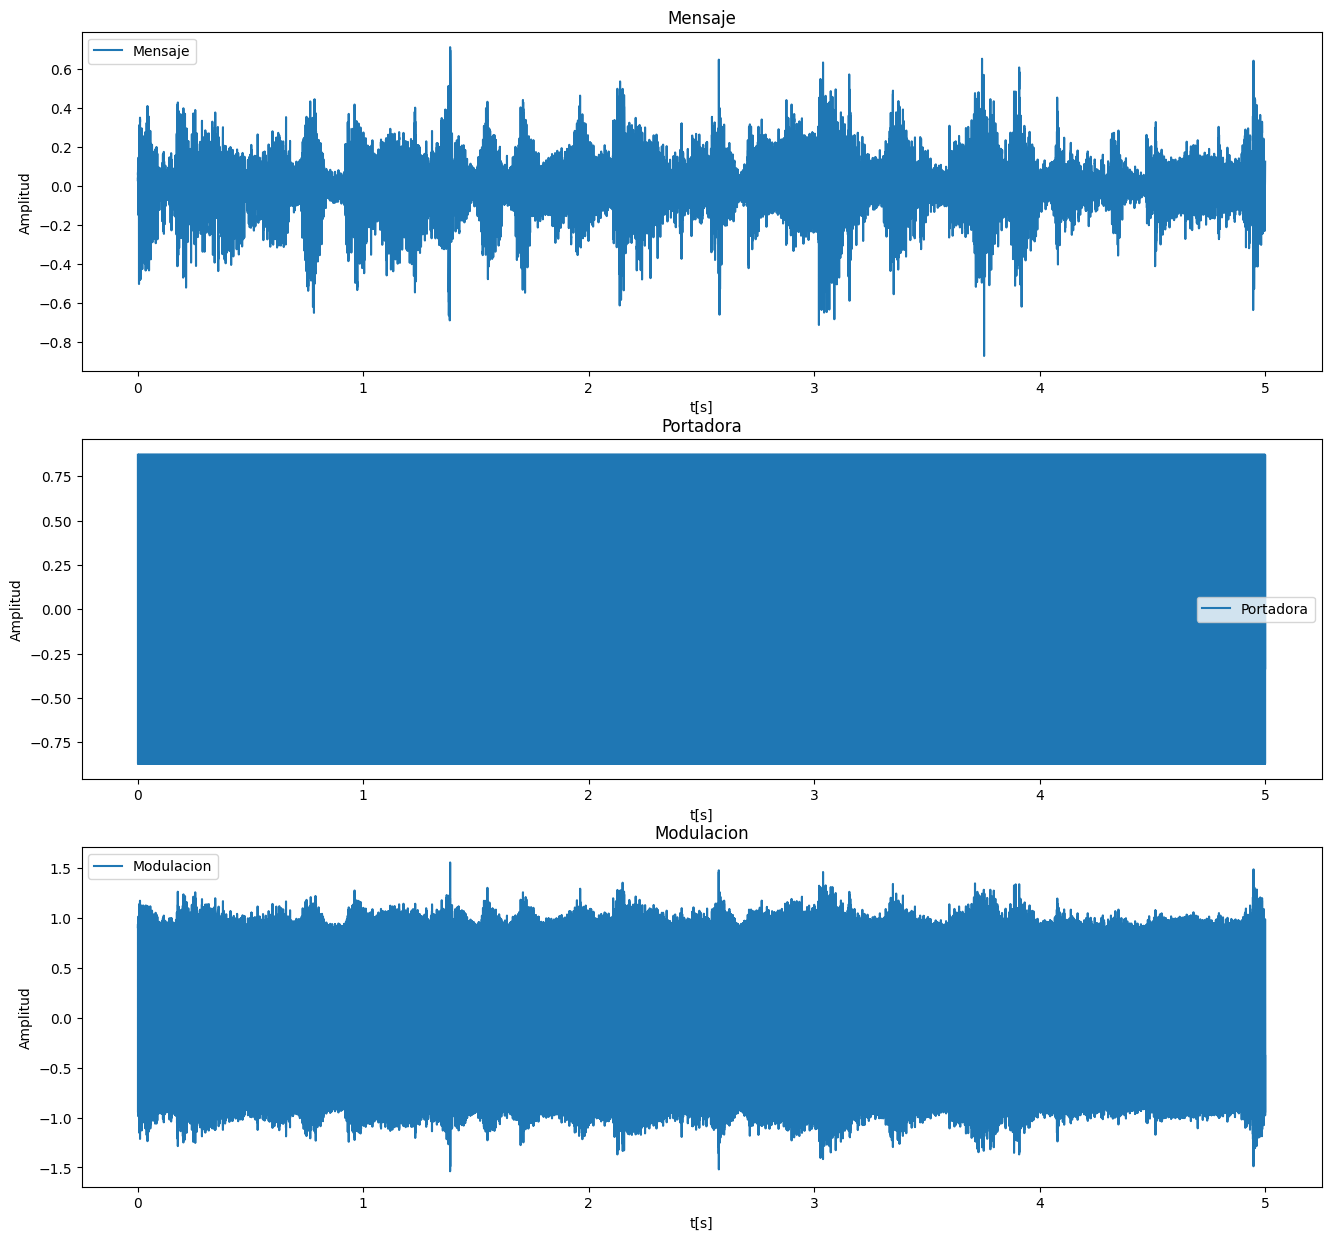

In [8]:
# @title Gráficas en el tiempo

plt.figure(figsize=(16,15))

plt.subplot(311)
plt.title('Mensaje')
plt.plot(t,XC_1,label='Mensaje')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(312)
plt.title('Portadora')
plt.plot(t,SP,label='Portadora')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(313)
plt.title('Modulacion')
plt.plot(t,MOD,label='Modulacion')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


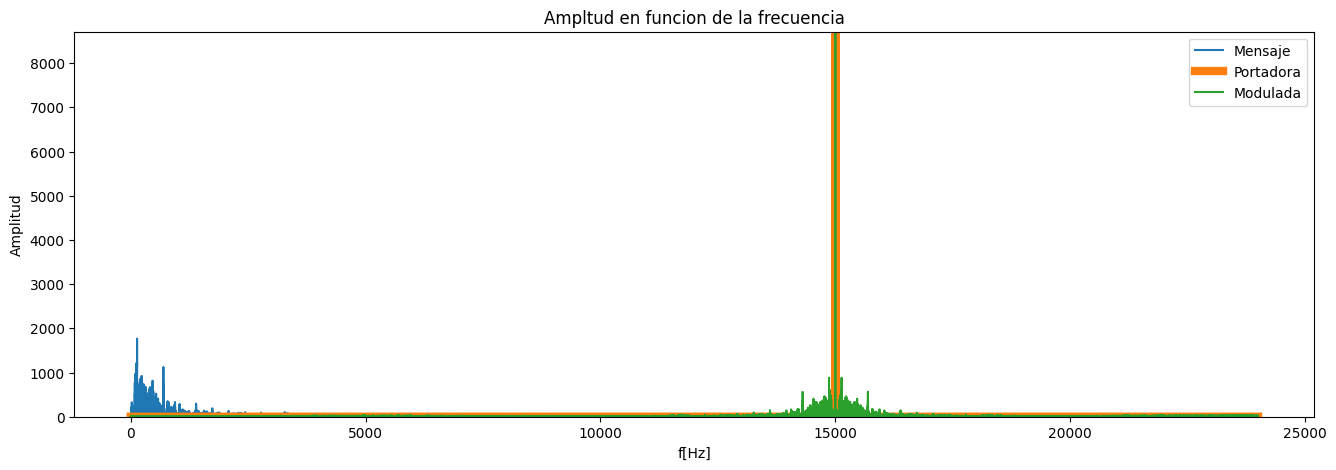

In [9]:
# @title Gráficas en la frecuencia

plt.figure(figsize=(16,5))
plt.ylim([min(abs(XC_1)), 10000*max(abs(XC_1))])
plt.plot(VF,TE,label='Mensaje')
plt.plot(VF,TP,label='Portadora',linewidth=6)
plt.plot(VF,TM,label='Modulada')
plt.title('Ampltud en funcion de la frecuencia')
plt.xlabel('f[Hz]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

In [10]:
Audio(XC_1,rate=fs)

In [11]:
Audio(SP,rate=fs)

In [12]:
Audio(MOD,rate=fs)

# Ahora, para empezar el proceso de demodulación, siguiendo el esquema del parcial 3, tomamos nuestra señal y la multiplicamos por la misma portadora.

<ipython-input-13-605a5d55a0b3>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


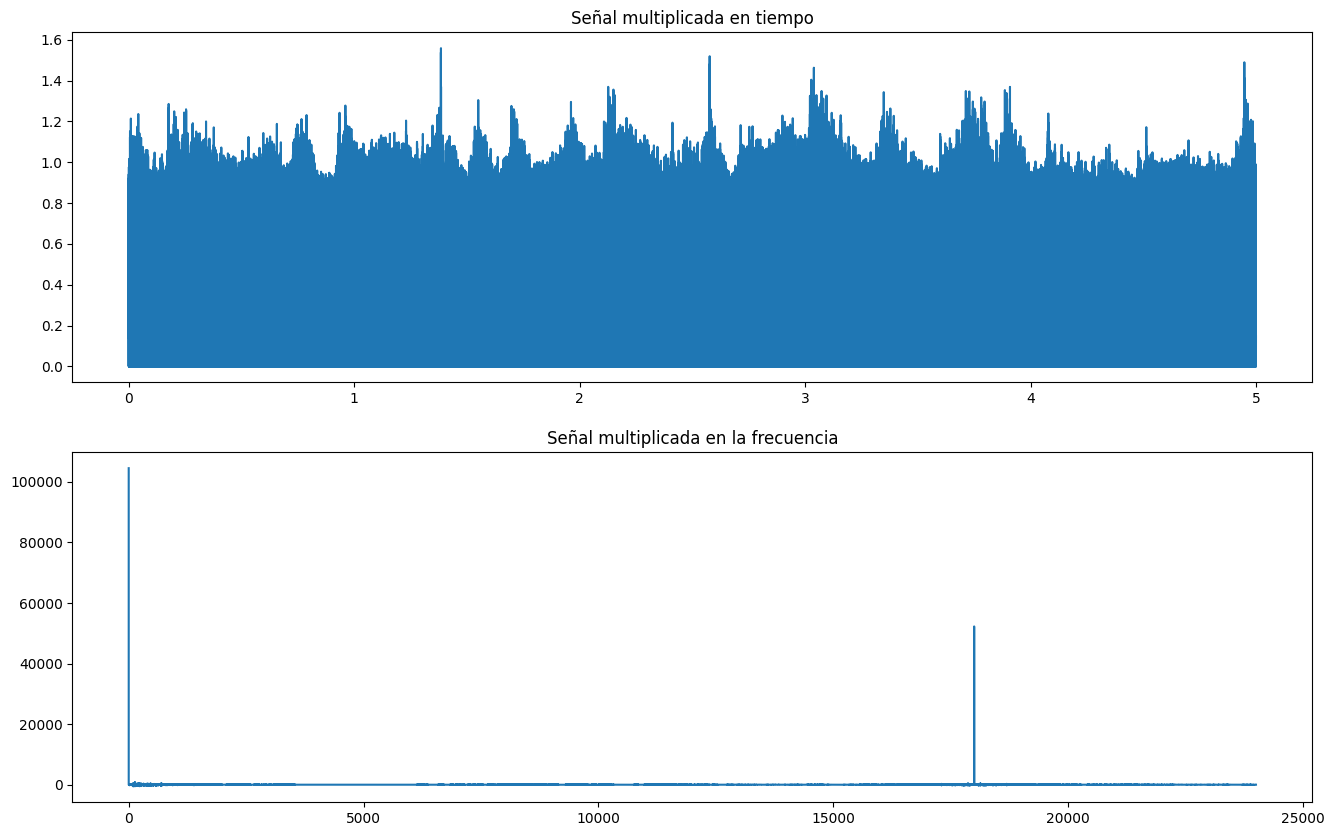

In [13]:
Alfa = np.cos(2*np.pi*15000*t)
Sm = MOD*Alfa #Señal modulada multiplicada por otro coseno
Smt = np.fft.rfft(Sm) #Transformada de la señal multiplicada

plt.figure(figsize=(16,10))
plt.ylim([min(abs(MOD)), 10000*max(abs(MOD))])

plt.subplot(211)
plt.plot(t,Sm)
plt.title('Señal multiplicada en tiempo')

plt.subplot(212)
plt.plot(VF,Smt)
plt.title('Señal multiplicada en la frecuencia')

plt.show()

In [14]:
Audio(Sm,rate=fs) #señal multiplicada

In [15]:
from scipy.signal import freqz
from scipy.signal import filtfilt
from scipy.signal import butter as bw
from scipy.signal import bessel
from scipy.signal import cheby1
from scipy.signal import cheby2

In [16]:
# @title Función para graficar respuesta en frecuencia
def freq(filter_name, w, h, orden): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(orden))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show()

# Ahora debemos aplicar los 3 diferentes tipos de filtros pasa bajas que nos piden: Butterworth, Bessel y Chebyshev (1,2)

In [32]:
#establecemos valores iniciales que aplicarán a cada filtro
filtro='lowpass'
normal='mag'
out='ba'
orden=3
frec=6000
rp = 3
rs = 5

#hallamos las constantes numerador/denominador de cada filtro
a, b = bw(orden,frec,btype=filtro,output=out,fs=fs)
c, d = bessel(orden,frec,btype=filtro,output=out,norm=normal,fs=fs)
e, f = cheby1(orden,rp,frec,btype=filtro,output=out,fs=fs)
g, h = cheby2(orden,rs,frec,btype=filtro,output=out,fs=fs)

#Filtramos la señal por cada configuración
X_butter = filtfilt(a,b,Sm)
X_bessel = filtfilt(c,d,Sm)
X_cheby1 = filtfilt(e,f,Sm)
X_cheby2 = filtfilt(g,h,Sm)

# Pintamos señales filtradas en tiempo y frecuencia

<function matplotlib.pyplot.show(close=None, block=None)>

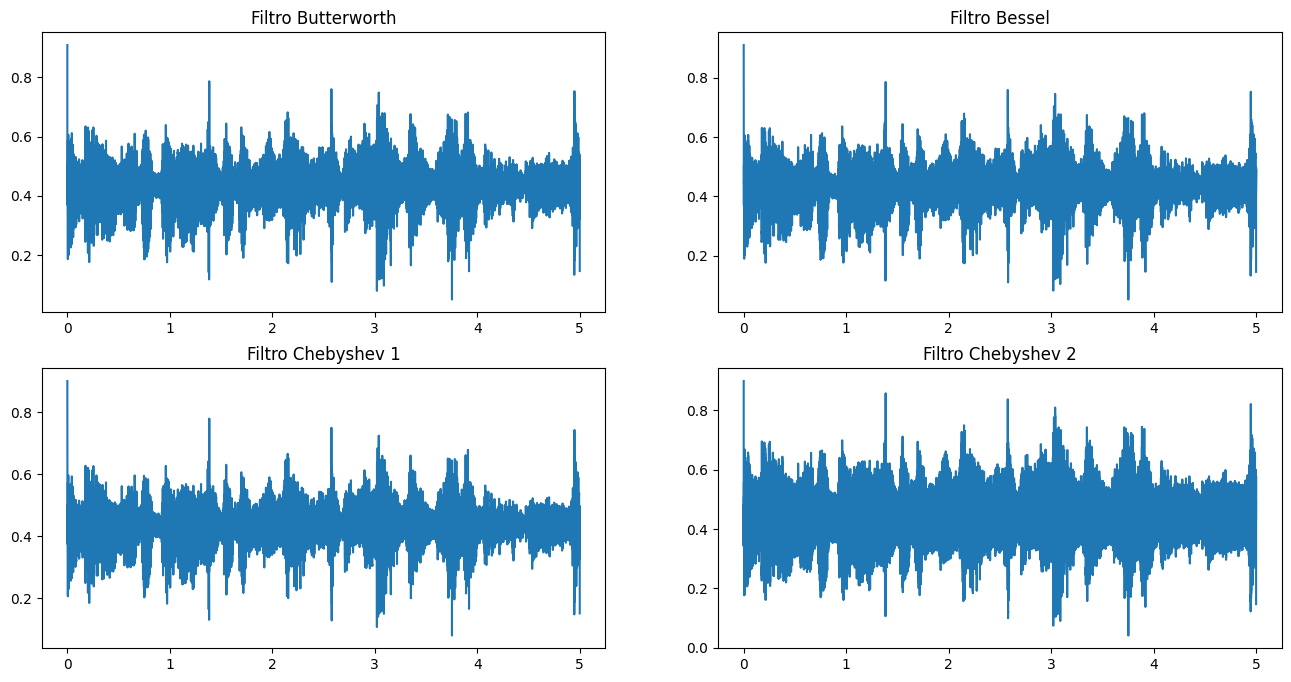

In [33]:
# @title En el tiempo:
plt.figure(figsize=(16,8))

plt.subplot(221)
plt.plot(t,X_butter)
plt.title('Filtro Butterworth')

plt.subplot(222)
plt.plot(t,X_bessel)
plt.title('Filtro Bessel')

plt.subplot(223)
plt.plot(t,X_cheby1)
plt.title('Filtro Chebyshev 1')

plt.subplot(224)
plt.plot(t,X_cheby2)
plt.title('Filtro Chebyshev 2')

plt.show

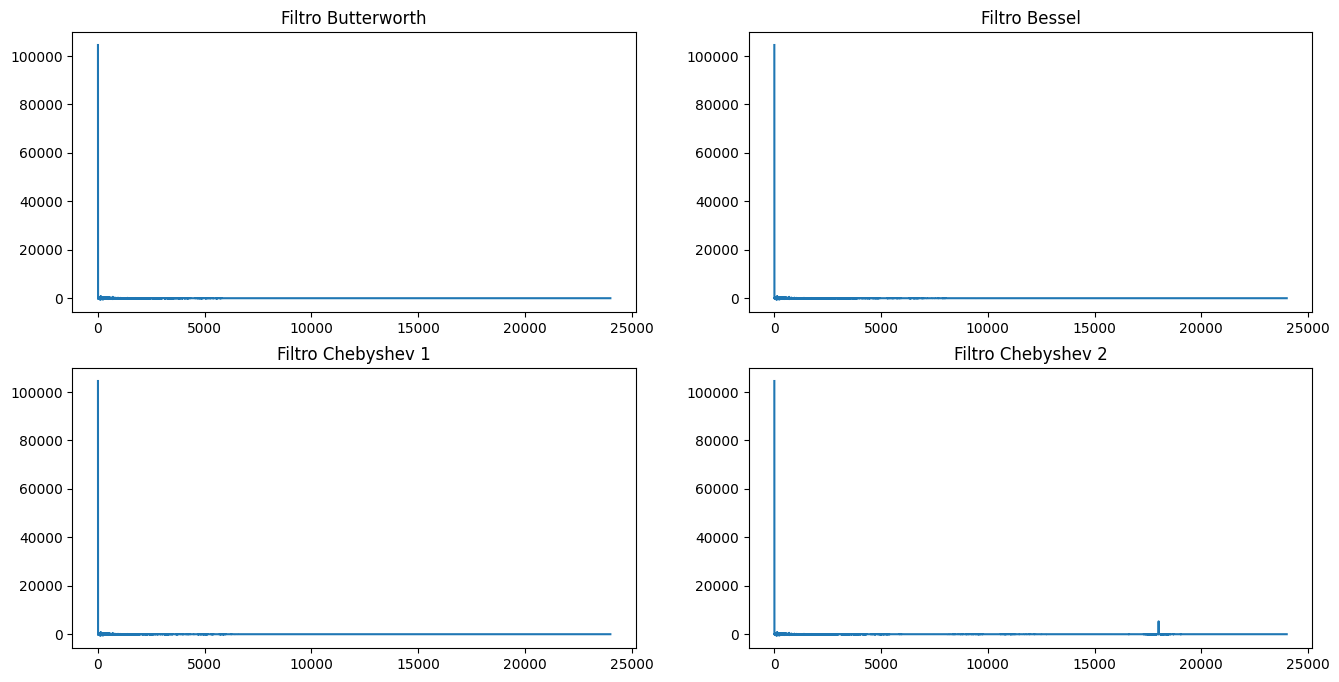

In [34]:
# @title En la frecuencia
#Transformadas
butter_t = np.fft.rfft(X_butter)
bessel_t = np.fft.rfft(X_bessel)
cheby1_t = np.fft.rfft(X_cheby1)
cheby2_t = np.fft.rfft(X_cheby2)

plt.figure(figsize=(16,8))

plt.subplot(221)
plt.plot(VF,butter_t)
plt.title('Filtro Butterworth')

plt.subplot(222)
plt.plot(VF,bessel_t)
plt.title('Filtro Bessel')

plt.subplot(223)
plt.plot(VF,cheby1_t)
plt.title('Filtro Chebyshev 1')

plt.subplot(224)
plt.plot(VF,cheby2_t)
plt.title('Filtro Chebyshev 2')

plt.show()

# Pintamos la respuesta en frecuencia de cada filtro con su respectivo audio

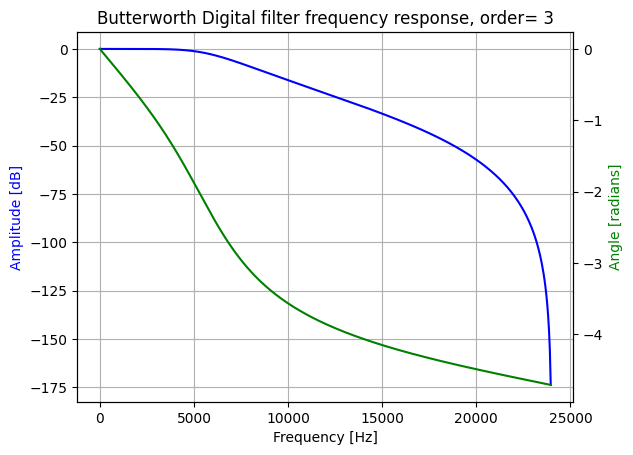

In [35]:
w, h = freqz(a, b, fs=fs)
freq('Butterworth',w,h,orden)

In [36]:
Audio(X_butter,rate=fs)

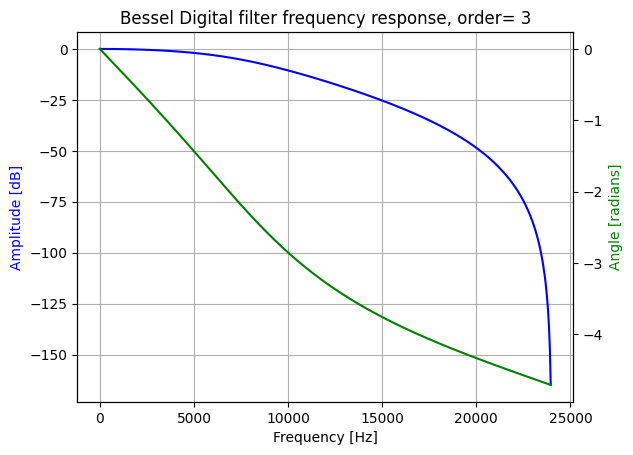

In [37]:
w, h = freqz(c, d, fs=fs)
freq('Bessel',w,h,orden)

In [38]:
Audio(X_bessel,rate=fs)

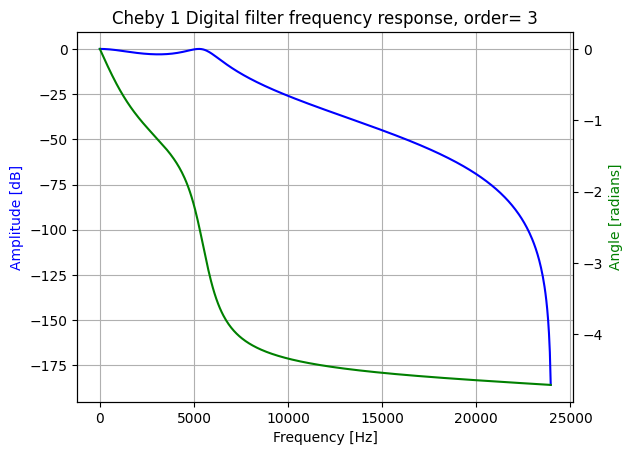

In [39]:
w, h = freqz(e, f, fs=fs)
freq('Cheby 1',w,h,orden)

In [40]:
Audio(X_cheby1,rate=fs)

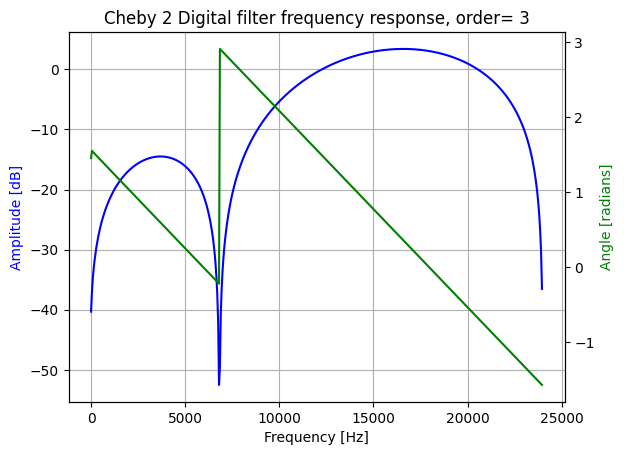

In [41]:
w, h = freqz(g, h, fs=fs)
freq('Cheby 2',w,h,orden)

In [42]:
Audio(X_cheby2,rate=fs)

# Buscamos la amplitud máxima en cada filtro para multiplicar por la constante y obtener la señal original

In [43]:
#constantes
w = float(max(abs(X_butter)))
x = float(max(abs(X_bessel)))
y = float(max(abs(X_cheby1)))
z = float(max(abs(X_cheby2)))

#señal filtrada multiplicada por constantes
m_t = (X_butter*2)/Ap
m_t2 = (X_bessel*2)
m_t3 = (X_cheby1*2)
m_t4 = (X_cheby2*2)

Audio(m_t,rate=fs)

In [44]:
Audio(XC_1,rate=fs)

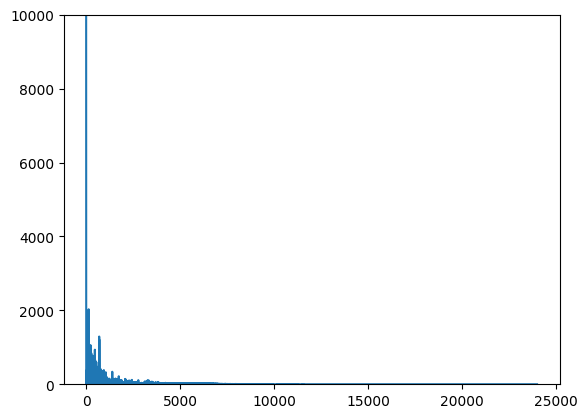

In [45]:
mtt = np.fft.rfft(m_t)
plt.ylim(0, 10000)
plt.plot(VF,mtt)